In [554]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [555]:
data = pd.read_csv("housing.csv")
data = data.dropna(axis=0, how="any") # Drop all rows with any empty values
target = data.pop("median_house_value") # Separate target values from input data

In [556]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462


In [557]:
target.head()

0    45.26
1    35.85
2    35.21
3    34.13
4    34.22
Name: median_house_value, dtype: float64

In [558]:
knn_reg = KNeighborsRegressor(n_neighbors=5, metric="euclidean")
knn_reg.fit(data, target)

KNeighborsRegressor(metric='euclidean')

In [559]:
data_test = data.iloc[5:6,:] # Take one data from the original data
target_prediction = knn_reg.predict(data_test)
print(f"Actual target value: {target[5]}")
print(f"Prediction target value: {prediction[0]}")

Actual target value: 26.97
Prediction target value: 18.668


In [560]:
# Start visualizing median income to median house value
data_new = data.copy().loc[range(200), "median_income"] # Get first 200 values of "median_income" column
target_new = target.copy().loc[range(200)]

In [561]:
data_new.head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

In [562]:
target_new.head()

0    45.26
1    35.85
2    35.21
3    34.13
4    34.22
Name: median_house_value, dtype: float64

In [563]:
data_new = data_new.values.reshape(-1, 1) # Reshape from 1D array to 2D array

In [564]:
knn_reg_new = KNeighborsRegressor(n_neighbors=5, metric="euclidean")
knn_reg_new.fit(data_new, target_new)

KNeighborsRegressor(metric='euclidean')

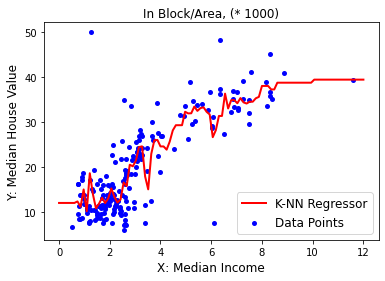

In [565]:
figure, axes = plt.subplots()
axes.scatter(data_new, target_new, color="blue", marker=".", linewidth=2, label="Data Points")
axes.set_title("In Block/Area, (* 1000)")
axes.set_xlabel("X: Median Income", fontsize=12)
axes.set_ylabel("Y: Median House Value", fontsize=12)
data_test = np.linspace(0, 12, 100).reshape(-1, 1) # Get random values from 0 to 12 (because median income varies from 0 to 12)
target_prediction = knn_reg_new.predict(data_test)
axes.plot(data_test, target_prediction, color="red", linewidth=2, label="K-NN Regressor")
axes.legend(fontsize=12)
# As you can see, the K-NN regressor curve is not linear because it makes decisions locally based on it's neighbours, unlike in linear regression where it is determined to be linear from the start (in the equation itself).

In [566]:
# Evaluate performance
target_prediction_test = knn_reg.predict(data)
mse = mean_squared_error(target, target_prediction_test)
mae = mean_absolute_error(target, target_prediction_test)
r2 = r2_score(target, target_prediction_test)
print(f"""Training set MSE = {mse}
Training set MAE = {mae}
Training set R2 = {r2}
""")

Training set MSE = 64.78410928744296
Training set MAE = 6.1946530210933295
Training set R2 = 0.5138058678955981

